# Project Group 10
<br>Name: Abhilash Narayanan
<br>ID: 49078178

In [60]:
install.packages("tidyverse")
install.packages("cluster")
install.packages("factoextra")
install.packages("dbscan")
install.packages("funtimes")
install.packages("clValid")
install.packages("e1071")

Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'cluster' is in use and will not be installed"
Warning message:
"package 'factoextra' is in use and will not be installed"


package 'dbscan' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dbscan'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\abhil\anaconda3\envs\DatamIning2\Lib\R\library\00LOCK\dbscan\libs\x64\dbscan.dll to C:\Users\abhil\anaconda3\envs\DatamIning2\Lib\R\library\dbscan\libs\x64\dbscan.dll: Permission denied"
Warning message:
"restored 'dbscan'"



The downloaded binary packages are in
	C:\Users\abhil\AppData\Local\Temp\RtmpQ11tNj\downloaded_packages


Warning message:
"package 'funtimes' is in use and will not be installed"


package 'clValid' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhil\AppData\Local\Temp\RtmpQ11tNj\downloaded_packages


Warning message:
"package 'e1071' is in use and will not be installed"


In [61]:
library("tidyverse")
library("ggplot2")
library("ggrepel")
library("DT")
library("cluster")
library("factoextra")
library("funtimes")
install.packages("clValid")
library("e1071")

package 'clValid' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhil\AppData\Local\Temp\RtmpQ11tNj\downloaded_packages


In [62]:
dataset_plus_census <- read.csv("https://raw.githubusercontent.com/yamphurai/Project2_ClusterAnalysis/refs/heads/main/updated_COVID-19_cases_plus_census.csv")
#filter the dataset by Texas
dataset_plus_census <- dataset_plus_census %>% filter(state == "TX")


## Excluding counties of the major cities

In [63]:
counties_to_exclude <- c(
  "Dallas County", "Tarrant County", "Collin County", "Denton County", "Ellis County",
  "Johnson County", "Kaufman County", "Parker County", "Rockwall County", "Wise County",
  "Hood County", "Travis County", "Williamson County", "Hays County", "Bastrop County",
  "Caldwell County", "Bexar County", "Comal County", "Guadalupe County", "Wilson County",
  "Medina County", "Kendall County", "Bandera County", "Atascosa County", "Harris County",
  "Fort Bend County", "Montgomery County", "Brazoria County", "Galveston County", "Liberty County",
  "Waller County", "Chambers County"
)

dataset_plus_census <- dataset_plus_census %>% 
  filter(! county_name %in% counties_to_exclude)

In [64]:
head(dataset_plus_census)
summary(dataset_plus_census)

,state,state_fips_code,county_name,confirmed_cases,deaths,total_pop,male_pop,female_pop,white_pop,black_pop,⋯,male_21_49,male_50_above,female_0_20,female_21_49,female_50_above,unemployed_pop,employed_pop,commute,worked_at_home,walked_to_work
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,TX,48,Hansford County,673,17,5532,2760,2772,2950,4,⋯,1052,922,858,1053,979,94,2394,4384,18,70
2,TX,48,Stonewall County,134,4,1084,555,529,787,38,⋯,113,325,129,112,306,11,442,836,7,0
3,TX,48,Cochran County,216,12,2932,1492,1440,1104,77,⋯,418,536,420,538,548,103,1189,2274,23,12
4,TX,48,Crockett County,472,13,3836,1903,1933,1264,35,⋯,512,748,584,662,738,43,1733,3346,60,0
5,TX,48,McCulloch County,467,12,8145,4171,3974,5067,161,⋯,1354,1765,911,1334,1885,122,3658,6566,61,104
6,TX,48,Sherman County,118,11,3067,1590,1477,1712,8,⋯,582,594,398,577,555,24,1604,2930,38,72


    state           state_fips_code county_name        confirmed_cases 
 Length:222         Min.   :48      Length:222         Min.   :     1  
 Class :character   1st Qu.:48      Class :character   1st Qu.:   436  
 Mode  :character   Median :48      Mode  :character   Median :  1077  
                    Mean   :48                         Mean   :  3619  
                    3rd Qu.:48                         3rd Qu.:  2544  
                    Max.   :48                         Max.   :107552  
     deaths          total_pop         male_pop        female_pop    
 Min.   :   0.00   Min.   :    74   Min.   :    39   Min.   :    35  
 1st Qu.:  12.00   1st Qu.:  5790   1st Qu.:  2894   1st Qu.:  2700  
 Median :  25.50   Median : 14448   Median :  7355   Median :  6766  
 Mean   :  77.73   Mean   : 42474   Mean   : 21230   Mean   : 21243  
 3rd Qu.:  61.75   3rd Qu.: 34990   3rd Qu.: 17795   3rd Qu.: 17256  
 Max.   :2018.00   Max.   :839539   Max.   :410383   Max.   :429156  
   whi

# Hierarchical Clustering

Hierarchical clustering is an alternative approach to for identifying groups in the dataset. It does not require us to pre-specify the number of clusters to be generated. Furthermore, hierarchical clustering has an added advantage that it results in an attractive tree-based representation of the observations, called a dendrogram.

## Creating the Dataset for Hierarchical Clustering

In [65]:
dataset_select_clustering <- dataset_plus_census %>% 
 # filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(white_pop, 
rent_under_50_percent, 
male_21_49, 
commute,
hispanic_pop,
income_50K_100K, 
female_21_49, 
worked_at_home,
income_100K_150K, 
male_50_above, 
hispanic_pop, 
male_21_49,  
rent_over_50_percent,
         deaths,
        confirmed_cases,total_pop,
        county_name)

dataset_select_clustering <- dataset_select_clustering %>% mutate(
  cases_per_1000 = confirmed_cases/total_pop*1000, 
  deaths_per_1000 = deaths/total_pop*1000, 
  death_per_case = deaths/confirmed_cases,
commute_1000=commute/total_pop*1000
)



summary(dataset_select_clustering)                                               

   white_pop      rent_under_50_percent   male_21_49        commute      
 Min.   :    55   Min.   :    7.0       Min.   :    10   Min.   :    66  
 1st Qu.:  2580   1st Qu.:  289.5       1st Qu.:   971   1st Qu.:  4344  
 Median :  7632   Median :  820.0       Median :  2600   Median :  9925  
 Mean   : 18563   Mean   : 3317.0       Mean   :  8189   Mean   : 32754  
 3rd Qu.: 18465   3rd Qu.: 2171.0       3rd Qu.:  6300   3rd Qu.: 26827  
 Max.   :162449   Max.   :73181.0       Max.   :167493   Max.   :647479  
  hispanic_pop    income_50K_100K    female_21_49      worked_at_home   
 Min.   :    12   Min.   :   19.0   Min.   :     8.0   Min.   :    0.0  
 1st Qu.:  1468   1st Qu.:  534.8   1st Qu.:   898.5   1st Qu.:   68.5  
 Median :  3700   Median : 1427.5   Median :  2184.0   Median :  190.0  
 Mean   : 19338   Mean   : 4176.5   Mean   :  7743.7   Mean   :  598.5  
 3rd Qu.:  9827   3rd Qu.: 3627.0   3rd Qu.:  5924.0   3rd Qu.:  515.0  
 Max.   :770794   Max.   :74071.0   Max.   :

## Scaling the data set and calculating the distance 

The below features are selected for the hierarchical clustering: <br>
median_income
<br>median_age
<br>commute_1000
<br>black_pop
<br>white_pop
<br>hispanic_pop

In [66]:
dataset_select_clustering_scale1 <-scale(dataset_select_clustering[,c("white_pop", "income_100K_150K", "rent_under_50_percent", "male_21_49", "commute")])
summary(dataset_select_clustering_scale1)

dataset_select_clustering_scale2 <-scale(dataset_select_clustering[,c("hispanic_pop", "income_50K_100K", "female_21_49", "worked_at_home")])
summary(dataset_select_clustering_scale1)

dataset_select_clustering_scale3 <-scale(dataset_select_clustering[,c("income_100K_150K", "rent_under_50_percent", "male_50_above", "commute")])
summary(dataset_select_clustering_scale1)

dataset_select_clustering_scale4 <-scale(dataset_select_clustering[,c("hispanic_pop", "income_50K_100K", "male_21_49", "commute", "rent_over_50_percent")])
summary(dataset_select_clustering_scale1)

   white_pop         income_100K_150K   rent_under_50_percent
 Min.   :-0.642387   Min.   :-0.49239   Min.   :-0.4068      
 1st Qu.:-0.554748   1st Qu.:-0.43887   1st Qu.:-0.3720      
 Median :-0.379400   Median :-0.34345   Median :-0.3069      
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000      
 3rd Qu.:-0.003394   3rd Qu.:-0.07254   3rd Qu.:-0.1408      
 Max.   : 4.994073   Max.   : 7.37936   Max.   : 8.5854      
   male_21_49          commute       
 Min.   :-0.42670   Min.   :-0.4412  
 1st Qu.:-0.37657   1st Qu.:-0.3834  
 Median :-0.29161   Median :-0.3081  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.:-0.09854   3rd Qu.:-0.0800  
 Max.   : 8.31051   Max.   : 8.2967  

   white_pop         income_100K_150K   rent_under_50_percent
 Min.   :-0.642387   Min.   :-0.49239   Min.   :-0.4068      
 1st Qu.:-0.554748   1st Qu.:-0.43887   1st Qu.:-0.3720      
 Median :-0.379400   Median :-0.34345   Median :-0.3069      
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000      
 3rd Qu.:-0.003394   3rd Qu.:-0.07254   3rd Qu.:-0.1408      
 Max.   : 4.994073   Max.   : 7.37936   Max.   : 8.5854      
   male_21_49          commute       
 Min.   :-0.42670   Min.   :-0.4412  
 1st Qu.:-0.37657   1st Qu.:-0.3834  
 Median :-0.29161   Median :-0.3081  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.:-0.09854   3rd Qu.:-0.0800  
 Max.   : 8.31051   Max.   : 8.2967  

   white_pop         income_100K_150K   rent_under_50_percent
 Min.   :-0.642387   Min.   :-0.49239   Min.   :-0.4068      
 1st Qu.:-0.554748   1st Qu.:-0.43887   1st Qu.:-0.3720      
 Median :-0.379400   Median :-0.34345   Median :-0.3069      
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000      
 3rd Qu.:-0.003394   3rd Qu.:-0.07254   3rd Qu.:-0.1408      
 Max.   : 4.994073   Max.   : 7.37936   Max.   : 8.5854      
   male_21_49          commute       
 Min.   :-0.42670   Min.   :-0.4412  
 1st Qu.:-0.37657   1st Qu.:-0.3834  
 Median :-0.29161   Median :-0.3081  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.:-0.09854   3rd Qu.:-0.0800  
 Max.   : 8.31051   Max.   : 8.2967  

   white_pop         income_100K_150K   rent_under_50_percent
 Min.   :-0.642387   Min.   :-0.49239   Min.   :-0.4068      
 1st Qu.:-0.554748   1st Qu.:-0.43887   1st Qu.:-0.3720      
 Median :-0.379400   Median :-0.34345   Median :-0.3069      
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000      
 3rd Qu.:-0.003394   3rd Qu.:-0.07254   3rd Qu.:-0.1408      
 Max.   : 4.994073   Max.   : 7.37936   Max.   : 8.5854      
   male_21_49          commute       
 Min.   :-0.42670   Min.   :-0.4412  
 1st Qu.:-0.37657   1st Qu.:-0.3834  
 Median :-0.29161   Median :-0.3081  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.:-0.09854   3rd Qu.:-0.0800  
 Max.   : 8.31051   Max.   : 8.2967  

## Identifying which linkage method can be used for this dataset

**Complete linkage clustering:**<br>It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, and considers the largest value (i.e., maximum value) of these dissimilarities as the distance between the two clusters. It tends to produce more compact clusters.
<br>
**Single linkage clustering:** 
It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, and considers the smallest of these dissimilarities as a linkage criterion. It tends to produce long, “loose” clusters.
<br>
**Mean or average linkage clustering:** 
It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, and considers the average of these dissimilarities as the distance between the two clusters.
<br>
**Ward’s minimum variance method:**
It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged.

In [67]:
agnes(dataset_select_clustering_scale1, method = "complete",trace.lev=0)

Call:	 agnes(x = dataset_select_clustering_scale1, method = "complete", trace.lev = 0) 
Agglomerative coefficient:  0.9877028 
Order of objects:
  [1]   1   2   3   9   6   7   8  12  11   4   5  10  18  20  24  31  27  33
 [19]  34  25  13  15  16  19  14  17  21  22  26  43  68  28  46  47  52  66
 [37]  60  81  63 100 112  71  78  91  67  93  55 107  72  76  82 126  73 124
 [55] 102  79 116 115  77 132  84  98 103 106 110 128  89  94 101 114 117  74
 [73]  88 104 141  36  50  53  90  44  57  59  70  61  80  62  86  65  69  85
 [91]  83  96  92  75 120 121  87 122  99 137 164 109 133 153 127 144 151 170
[109] 146 156 162 177 181  97 108 139 150 179 142 149 129 135 111 118 119 154
[127] 123 155 161 165  95 113 105 125 131 136 185 130 134 138 171 143 166 187
[145] 140 147 152 148 180 145 158 169 160 172 159 173 167 195 175 168 197 190
[163] 176 183 199 178 186 193 188 157 163 182 174 184 198 206 189 191 192 202
[181] 203 194 200 207 212 217 205 196 210 209 220 201 204 218 213 208 211 2

In [68]:
agnes(dataset_select_clustering_scale1, method = "ward",trace.lev=0)

Call:	 agnes(x = dataset_select_clustering_scale1, method = "ward", trace.lev = 0) 
Agglomerative coefficient:  0.9940167 
Order of objects:
  [1]   1   2   3   9   6   7   8  12  11   4   5  10  18  20  24  31  27  33
 [19]  34  25  13  15  16  19  14  17  21  22  26  43  68  28  46  47  55  72
 [37]  76  73 124 102  79 116 115  77 132  82 126  89  94 101 117 114  74  88
 [55] 104 141  36  50  53  90  44  57  59  70  61  80  62  86  23  35  29  39
 [73]  42  37  38  45  30  49  32  40  58  41  48  51  64  54  56  52  66  60
 [91]  81  67  93  63 100 112  71  78  91  84  98 103 106 110 128  65  69  85
[109]  83  96  92 107  75 120 121  87 122 109 133 153  97 161 123 155 108 139
[127] 150 179 142 149 129 135 111 118 127 144 151 170 146 119 154 165  95 105
[145] 125 113 131 136  99 137 164 180 185 130 134 138 171 143 148 166 187 140
[163] 147 152 159 173 167 195 175 156 162 177 181 145 158 169 160 172 157 174
[181] 184 198 206 189 191 192 202 203 194 200 205 207 212 217 168 197 190 188
[

In [69]:
agnes(dataset_select_clustering_scale1, method = "single",trace.lev=0)

Call:	 agnes(x = dataset_select_clustering_scale1, method = "single", trace.lev = 0) 
Agglomerative coefficient:  0.9679563 
Order of objects:
  [1]   1   2   3   9   7   8  12  11  10  18  20  15  16  19  21  22  26  28
 [19]  46  44  57  61  59  70  80  52  66  60  81  63  73 124  79 116 128  78
 [37]  91 100  84  98 106 110 112 115  75 120 121  87 109 133 130 134 138 171
 [55] 143 163 182 194 200 202 203 196 210 204 218 213 208 211 209 220 201 214
 [73] 215 221 219 222 216 207 212 217 205 184 198 206 189 192 166 187 168 183
 [91] 199 197 176 178 186 193 190 188 174 148 175 140 147 152 191 158 160 172
[109] 169 137 159 173 195 167 157 164 180 131 136 105 125 113 145  99 185 108
[127] 118 139 150 179 149 142 111 127 144 151 170 146 135 119 154 156 162 177
[145] 181 129  97  83  96  95 161  92 123 155 103 102 153  77 132  71  88 104
[163] 126  89  94 101  82 122 107 165  72  76  67  65  69  85 141  62  86  74
[181] 114 117  93  55  32  40  58  41  54  48  56  51  64  68  43  90  30  49

In [70]:
agnes(dataset_select_clustering_scale1, method = "average",trace.lev=0)

Call:	 agnes(x = dataset_select_clustering_scale1, method = "average", trace.lev = 0) 
Agglomerative coefficient:  0.9859381 
Order of objects:
  [1]   1   2   3   9   6   7   8  12  11   4   5  10  18  20  15  16  19  24
 [19]  31  27  33  34  25  13  14  17  21  22  26  28  46  43  68  47  55  52
 [37]  66  60  81  67  93  63  71  78  91 100  84  98 103 106 110 112 128  72
 [55]  76  73 124  79 116 115 102  82  89  94 101  77 132  88 104 126 114 117
 [73]  65  69  85  83  96  92 107  75 120 121  87 153 109 133 122 111 118 127
 [91] 144 151 170 146 119 154 156 162 177 181  97 108 139 150 179 149 142 129
[109] 135 123 155 161 165  95 105 125 113  99 185 130 134 138 171 143 166 187
[127] 148 140 147 152 168 197 190 176 183 199 178 186 193 188 175 137 164 159
[145] 173 195 167 180 131 136 145 157 158 160 172 169 163 182 196 210 201 204
[163] 218 213 208 211 209 220 216 214 215 221 219 222 174 184 198 206 189 192
[181] 194 200 207 212 217 202 203 205 191  23  35  39  29  37  38  45  42  3

Since **Wards Minimum Variance Method** had the highest Agglomerative Coefficient.We are using that for hiearchical clustering

## Clustering

### Cluster 1

In [71]:
cluster1 <- agnes(dataset_select_clustering_scale1, method = "ward")
cluster2 <- agnes(dataset_select_clustering_scale2, method = "ward")
cluster3 <- agnes(dataset_select_clustering_scale3, method = "ward")
cluster4 <- agnes(dataset_select_clustering_scale4, method = "ward")

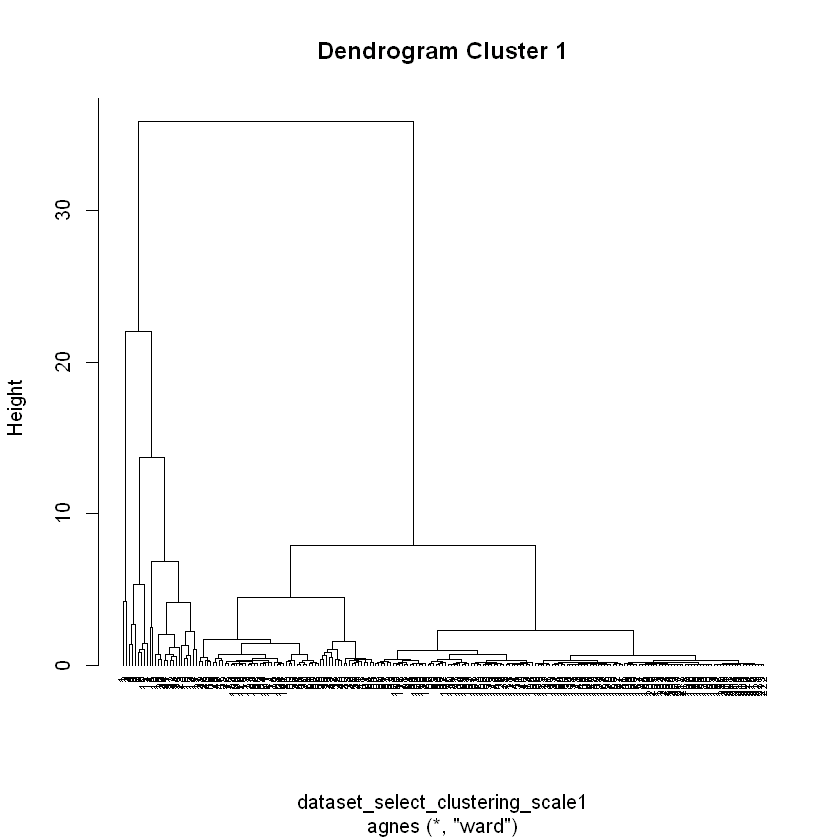

In [72]:
#Viewing the clusters in a dendrogram
pltree(cluster1, cex = 0.6, hang = -1, main = "Dendrogram Cluster 1")

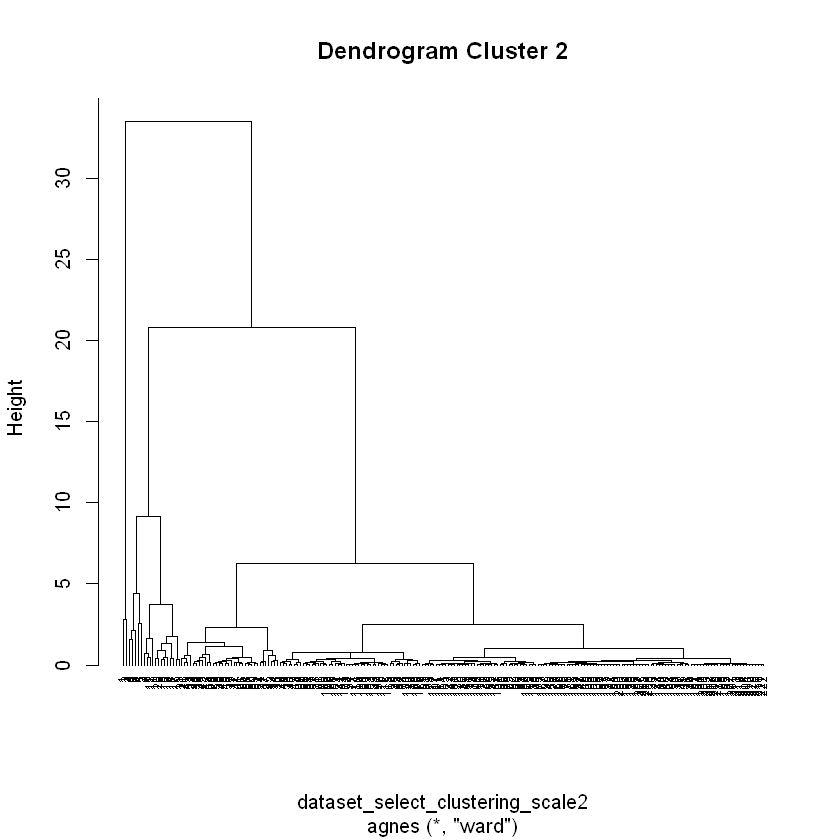

In [73]:
pltree(cluster2, cex = 0.6, hang = -1, main = "Dendrogram Cluster 2") 

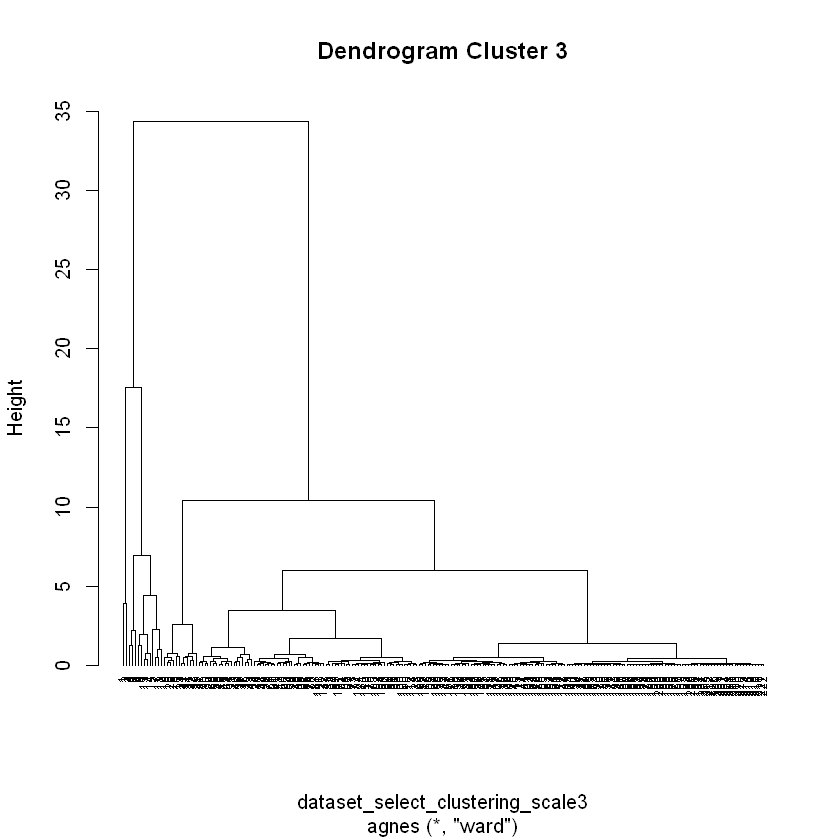

In [74]:
pltree(cluster3, cex = 0.6, hang = -1, main = "Dendrogram Cluster 3") 

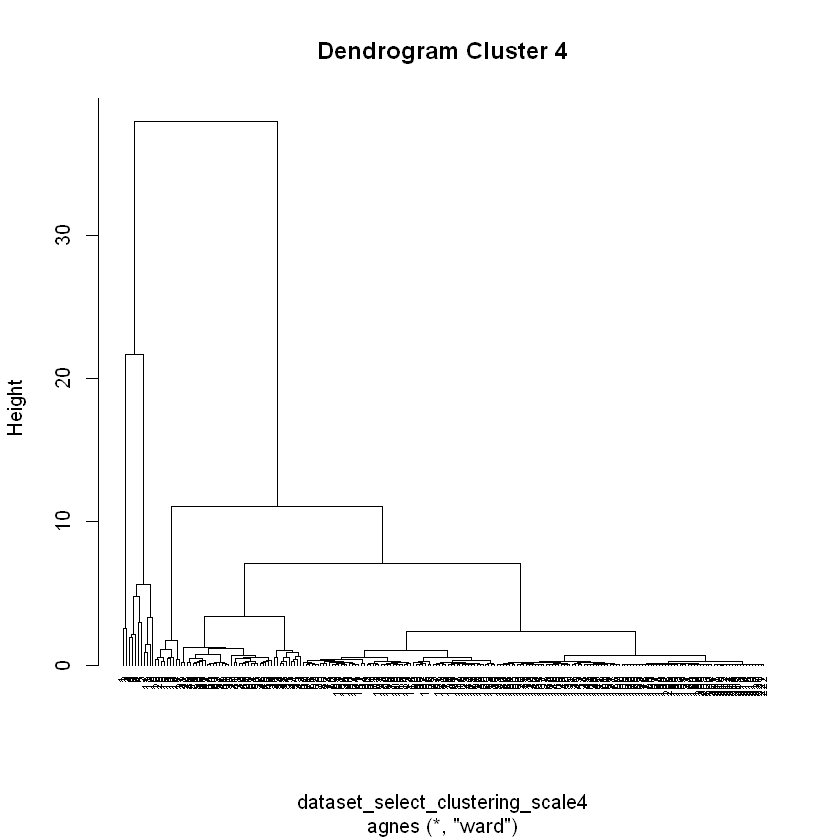

In [75]:
pltree(cluster4, cex = 0.6, hang = -1, main = "Dendrogram Cluster 4")

## Applying the Clusters to the original dataset

In [76]:
cluster1 <- hclust(dist(dataset_select_clustering_scale1), method = "ward.D2")
cluster2 <- hclust(dist(dataset_select_clustering_scale2), method = "ward.D2")
cluster3 <- hclust(dist(dataset_select_clustering_scale3), method = "ward.D2")
cluster4 <- hclust(dist(dataset_select_clustering_scale4), method = "ward.D2")

## UnSupervised Cluster Evaluation

Here we are evaluating 4 different Cluster sizes , CLusters with cluster number 2,4,6,8 to identify which would be the best clustering

### Gap Statistics

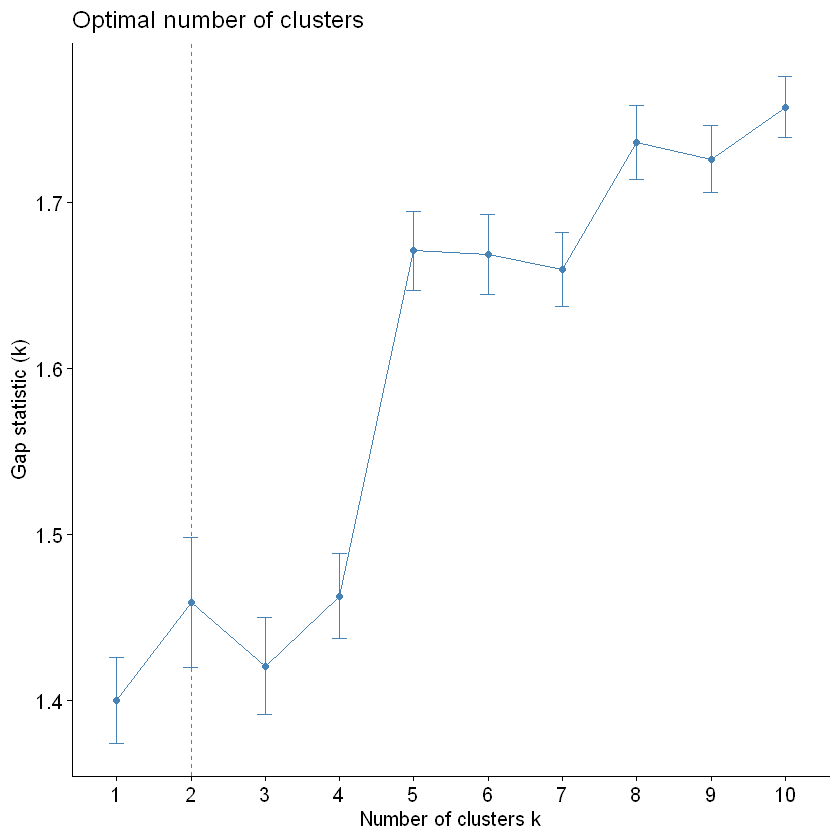

In [77]:
gap_stat1 <- clusGap(dataset_select_clustering_scale1, FUN = hcut, nstart = 10,K.min=3, K.max = 10, B = 100)
fviz_gap_stat(gap_stat1)  

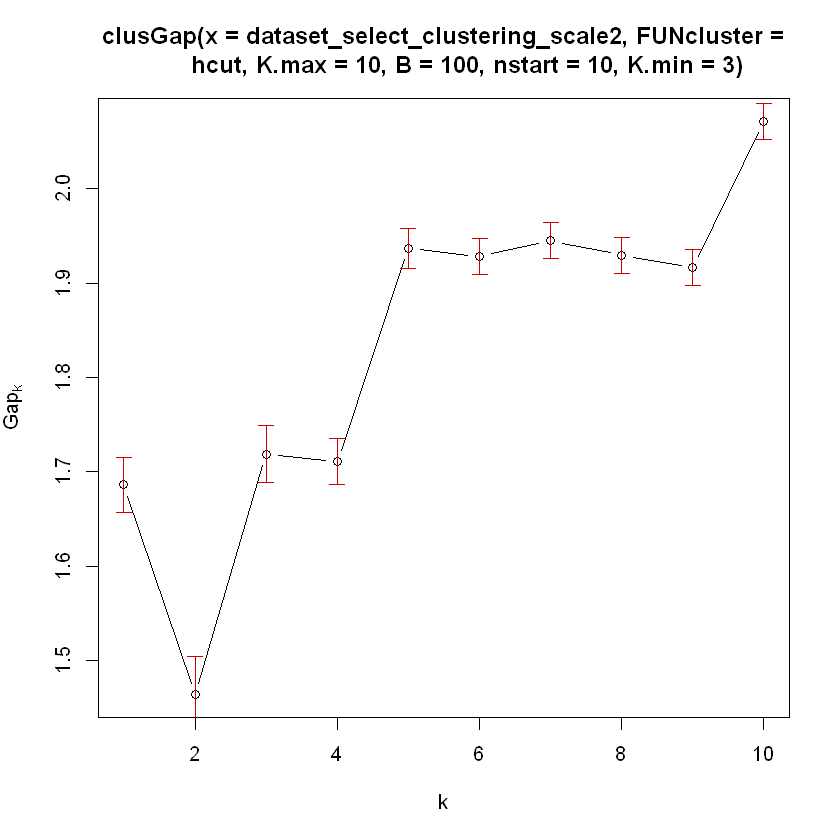

In [78]:
gap_stat2 <- clusGap(dataset_select_clustering_scale2, FUN = hcut, nstart = 10,K.min=3, K.max = 10, B = 100)
plot(gap_stat2)

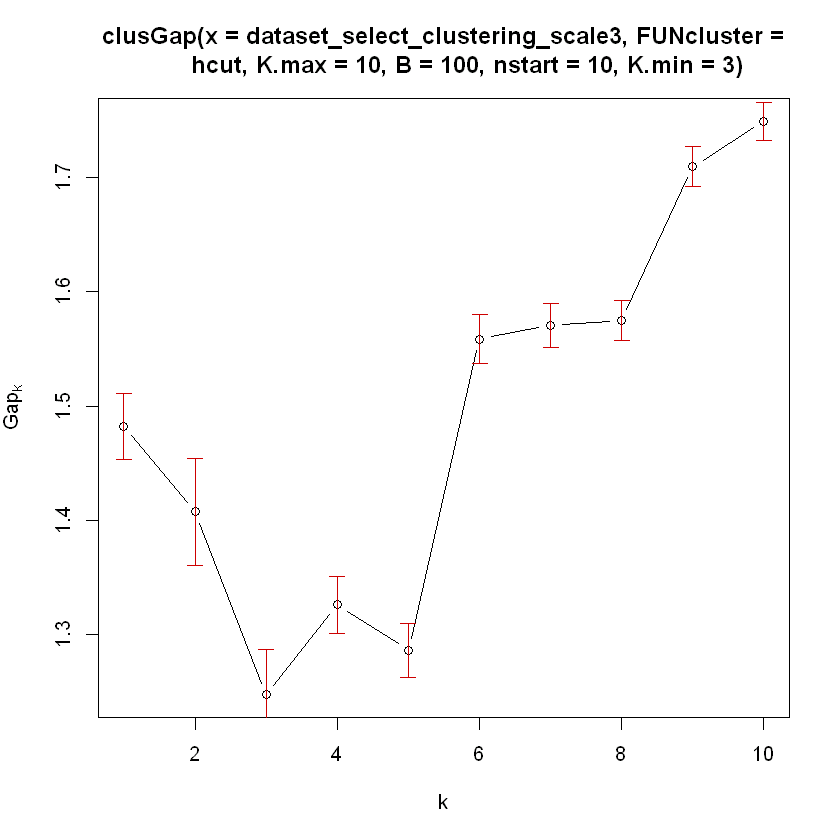

In [79]:
gap_stat3 <- clusGap(dataset_select_clustering_scale3, FUN = hcut, nstart = 10,K.min=3, K.max = 10, B = 100)
plot(gap_stat3)

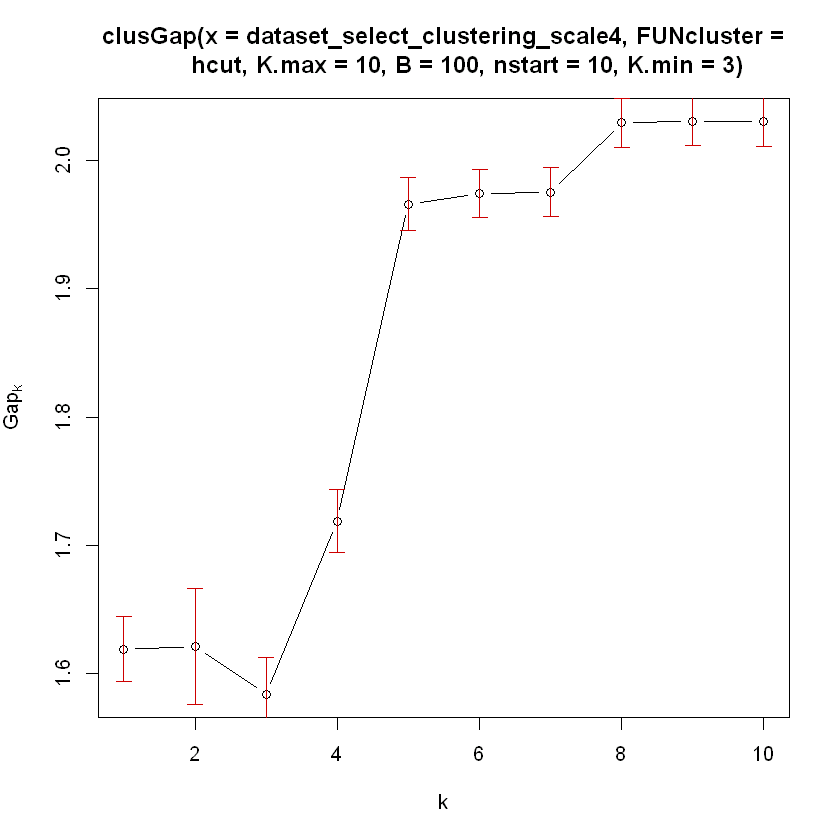

In [80]:
gap_stat4 <- clusGap(dataset_select_clustering_scale4, FUN = hcut, nstart = 10,K.min=3, K.max = 10, B = 100)
plot(gap_stat4)

According to gap Statistics the optimal number of clusters is **2**.

### Silhouette Coefficient

#### Cluster 1

In [81]:
dataset_hclust_results1 <- dataset_select_clustering
dataset_hclust_results2 <- dataset_select_clustering
dataset_hclust_results3 <- dataset_select_clustering
dataset_hclust_results4 <- dataset_select_clustering
dataset_hclust_results1$cluster <- cutree(cluster1, 2)
dataset_hclust_results2$cluster <- cutree(cluster1, 4)
dataset_hclust_results3$cluster <- cutree(cluster1, 6)
dataset_hclust_results4$cluster <- cutree(cluster1, 8)

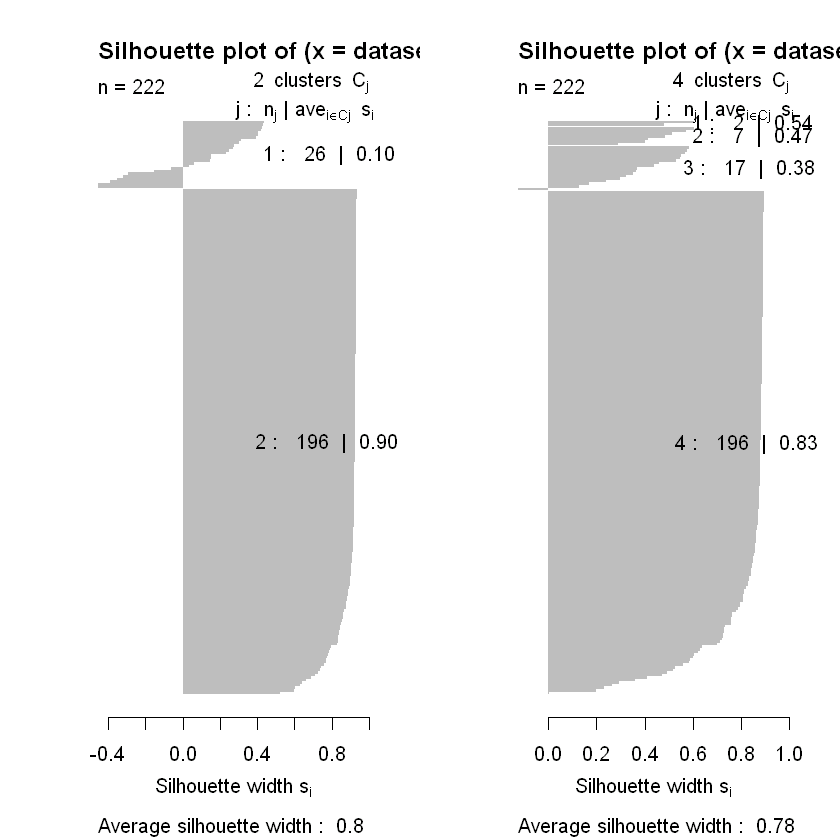

In [82]:
d <- dist(dataset_select_clustering_scale1)

par(mfrow = c(1, 2))
plot(silhouette(dataset_hclust_results1$cluster, d))
plot(silhouette(dataset_hclust_results2$cluster, d))

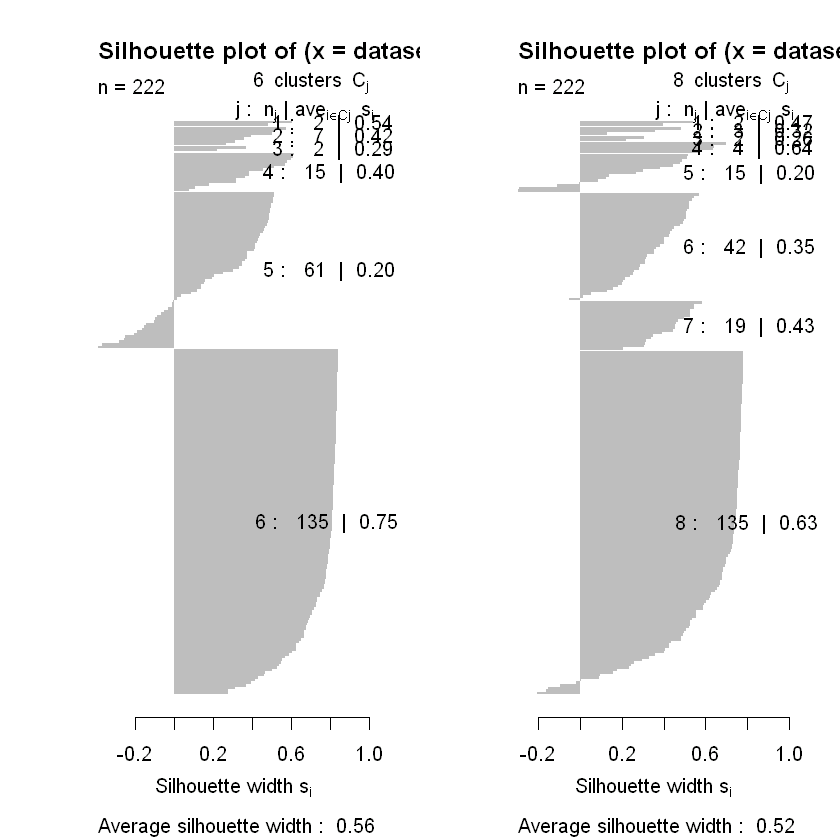

In [83]:
par(mfrow = c(1, 2))
plot(silhouette(dataset_hclust_results3$cluster, d))
plot(silhouette(dataset_hclust_results4$cluster, d))


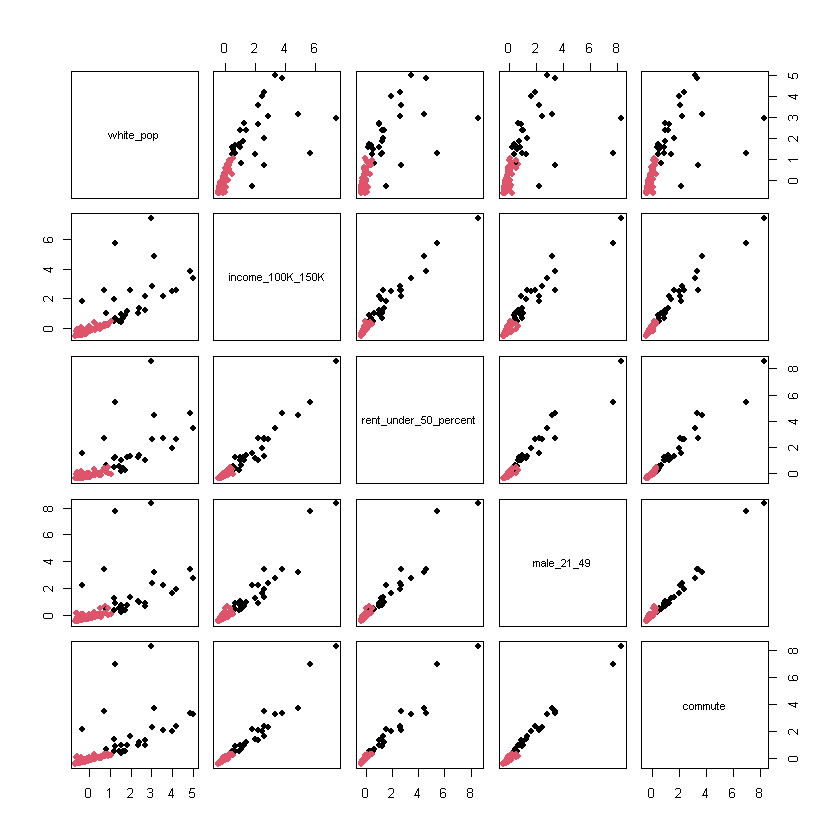

In [84]:
pairs(dataset_select_clustering_scale1, 
      pch = 16, col = as.numeric(dataset_hclust_results1$cluster))

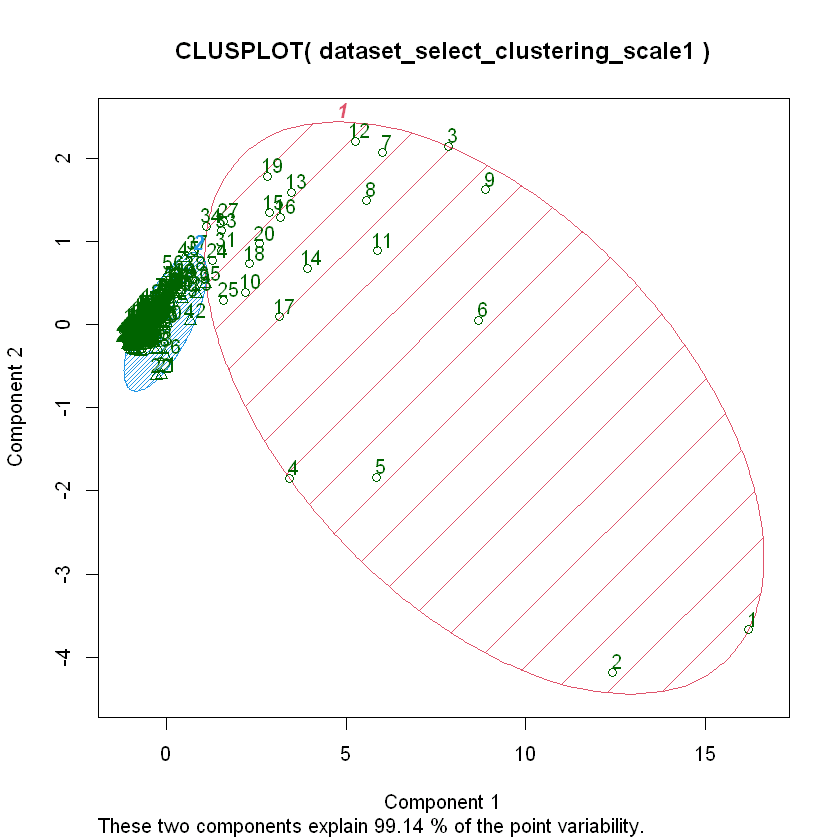

In [85]:
winner1<- dataset_hclust_results1$cluster
clusplot(dataset_select_clustering_scale1, dataset_hclust_results1$cluster, color = TRUE, shade = TRUE, 
         labels = 2, lines = 0)

In [86]:
counties <- as_tibble(map_data("county"))
counties_TX <- counties %>% dplyr::filter(region == "texas") %>% rename(c(county = subregion))

dataset_hclust_results1 <- dataset_hclust_results1 %>% mutate(county = county_name %>% str_to_lower() %>% 
    str_replace('\\s+county\\s*$', ''))
nrow(dataset_hclust_results1)
nrow(counties_TX)
dataset_hclust_results_map<-right_join(dataset_hclust_results1,counties_TX, join_by(county))

length(unique(dataset_hclust_results_map$county))
nrow(dataset_hclust_results_map)


[1] 222

[1] 4488

[1] 254

[1] 4488

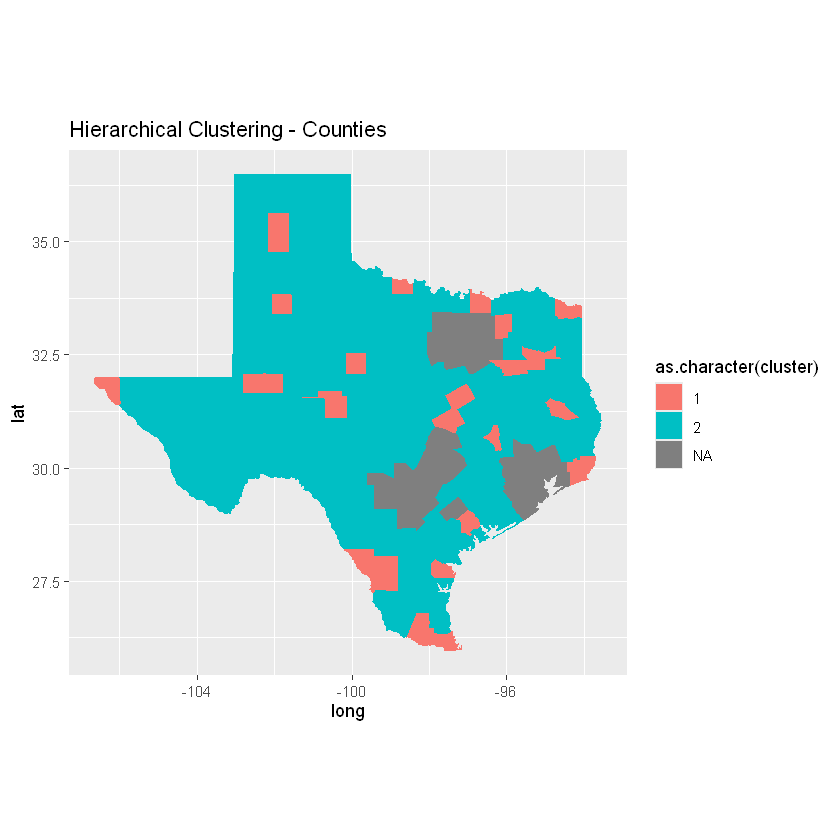

In [87]:

ggplot(dataset_hclust_results_map, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = as.character(cluster))) +
  coord_quickmap() +
  labs(title = "Hierarchical Clustering - Counties")

#### Cluster 2

In [88]:
dataset_hclust_results1 <- dataset_select_clustering
dataset_hclust_results2 <- dataset_select_clustering
dataset_hclust_results3 <- dataset_select_clustering
dataset_hclust_results4 <- dataset_select_clustering
dataset_hclust_results1$cluster <- cutree(cluster2, 2)
dataset_hclust_results2$cluster <- cutree(cluster2, 4)
dataset_hclust_results3$cluster <- cutree(cluster2, 6)
dataset_hclust_results4$cluster <- cutree(cluster2, 8)

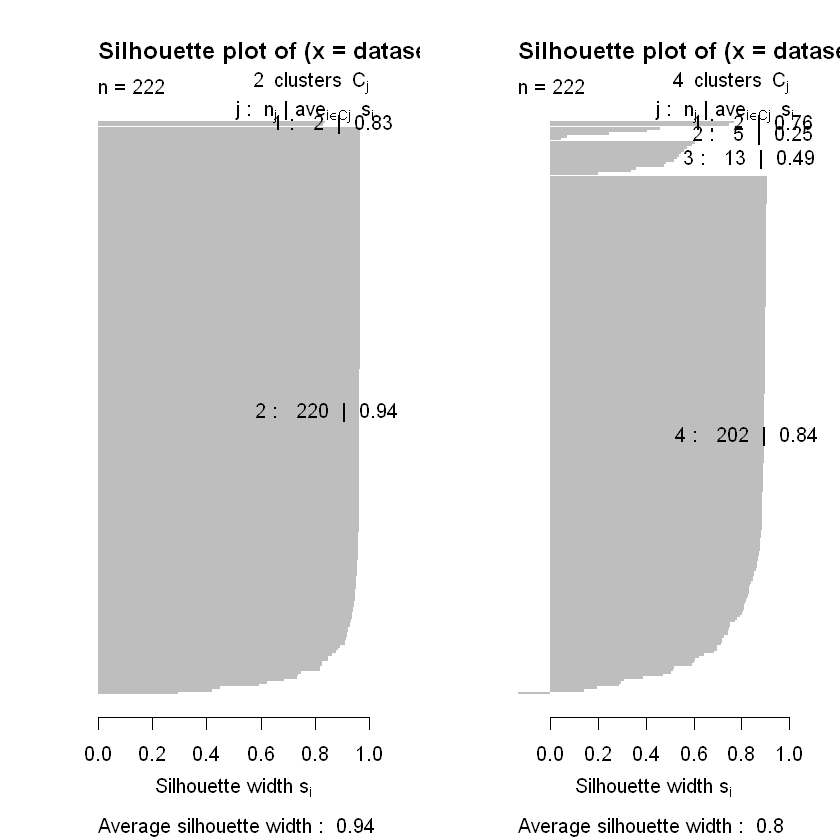

In [89]:
d <- dist(dataset_select_clustering_scale2)

par(mfrow = c(1, 2))
plot(silhouette(dataset_hclust_results1$cluster, d))
plot(silhouette(dataset_hclust_results2$cluster, d))

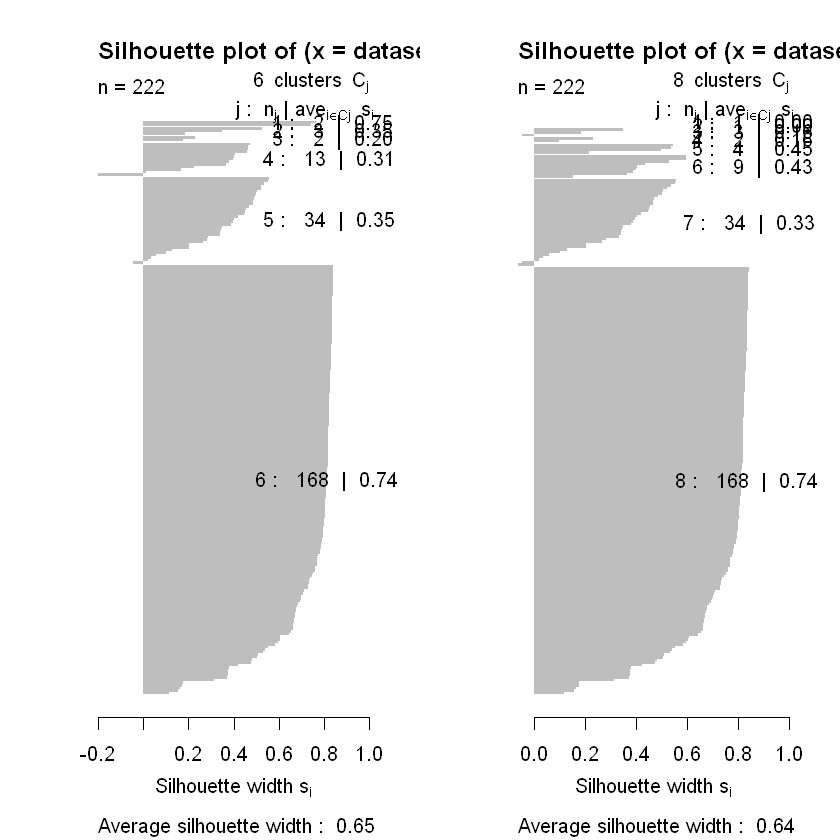

In [90]:
par(mfrow = c(1, 2))
plot(silhouette(dataset_hclust_results3$cluster, d))
plot(silhouette(dataset_hclust_results4$cluster, d))

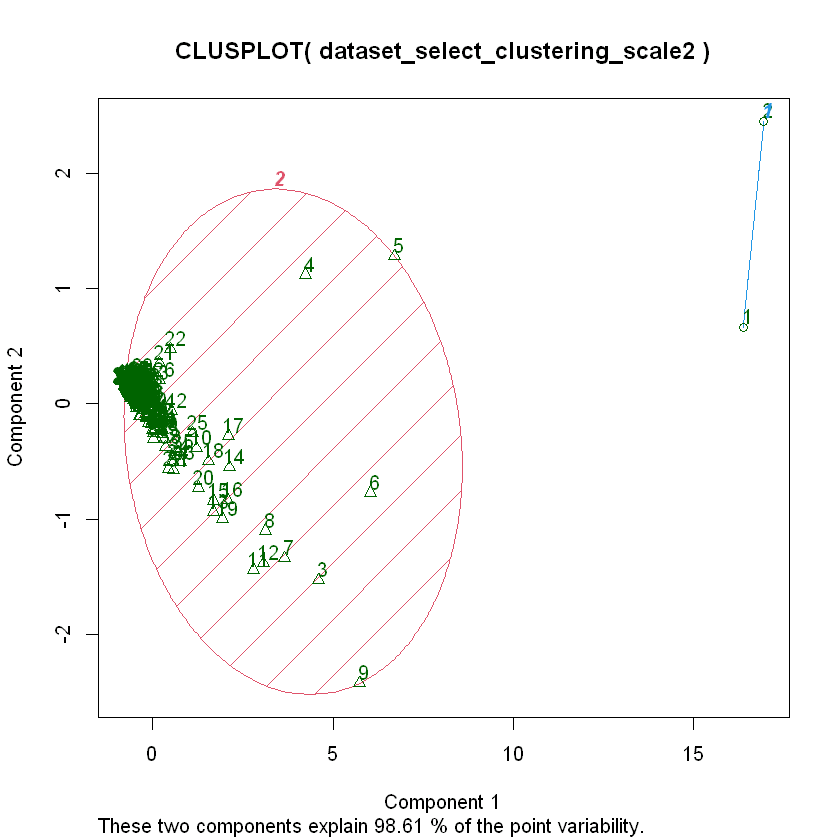

In [91]:
winner2<- dataset_hclust_results1$cluster
clusplot(dataset_select_clustering_scale2, dataset_hclust_results1$cluster, color = TRUE, shade = TRUE, 
         labels = 2, lines = 0)

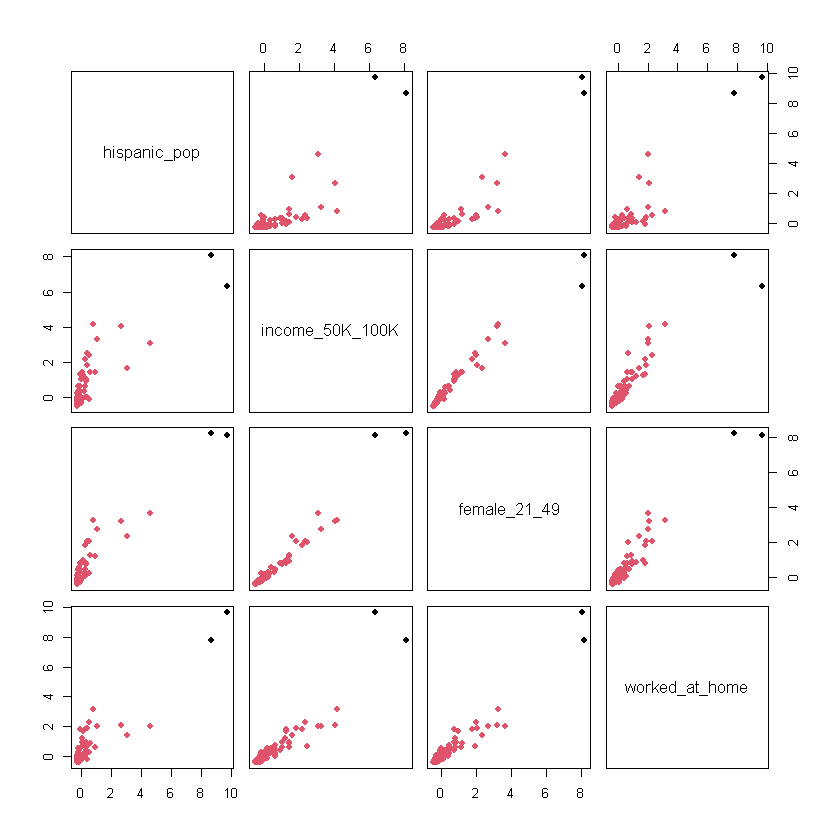

In [92]:
winner2<- dataset_hclust_results2$cluster

pairs(dataset_select_clustering_scale2, 
      pch = 16, col = as.numeric(dataset_hclust_results1$cluster))

In [93]:
counties <- as_tibble(map_data("county"))
counties_TX <- counties %>% dplyr::filter(region == "texas") %>% rename(c(county = subregion))

dataset_hclust_results1 <- dataset_hclust_results1 %>% mutate(county = county_name %>% str_to_lower() %>% 
    str_replace('\\s+county\\s*$', ''))
nrow(dataset_hclust_results1)
nrow(counties_TX)
dataset_hclust_results_map<-right_join(dataset_hclust_results1,counties_TX, join_by(county))

length(unique(dataset_hclust_results_map$county))
nrow(dataset_hclust_results_map)

[1] 222

[1] 4488

[1] 254

[1] 4488

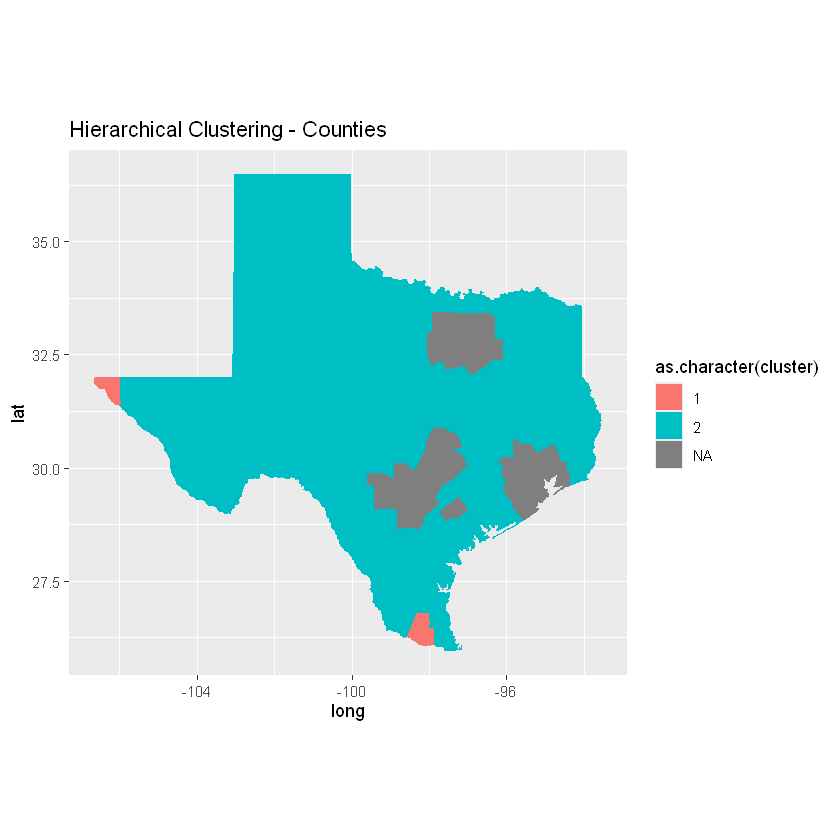

In [94]:
ggplot(dataset_hclust_results_map, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = as.character(cluster))) +
  coord_quickmap() +
  labs(title = "Hierarchical Clustering - Counties")

## Cluster 3

In [95]:
dataset_hclust_results1 <- dataset_select_clustering
dataset_hclust_results2 <- dataset_select_clustering
dataset_hclust_results3 <- dataset_select_clustering
dataset_hclust_results4 <- dataset_select_clustering
dataset_hclust_results1$cluster <- cutree(cluster3, 2)
dataset_hclust_results2$cluster <- cutree(cluster3, 4)
dataset_hclust_results3$cluster <- cutree(cluster3, 6)
dataset_hclust_results4$cluster <- cutree(cluster3, 8)

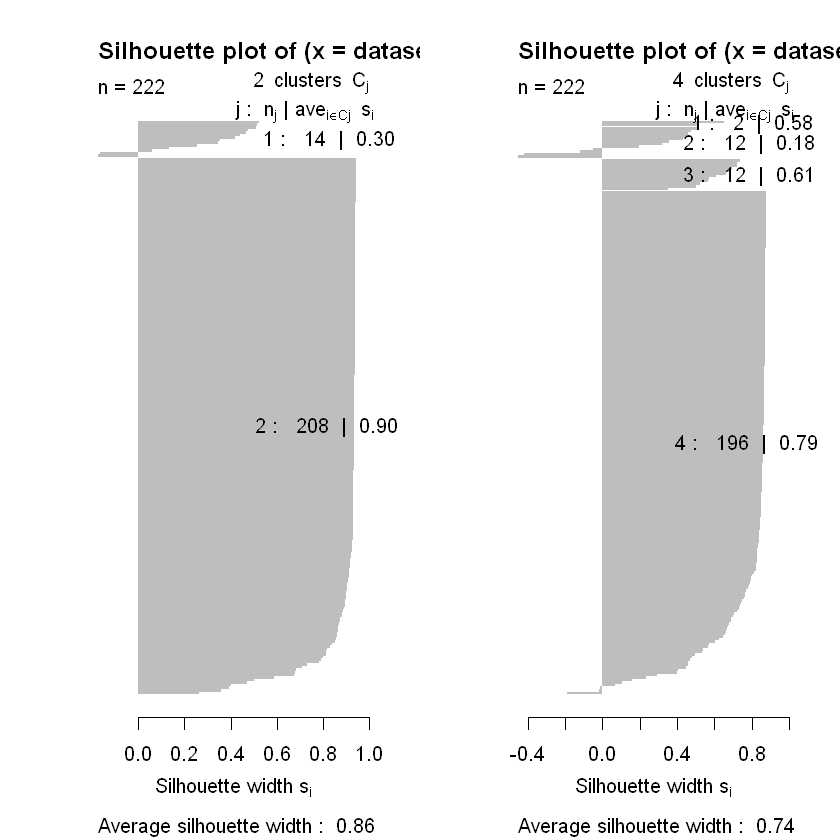

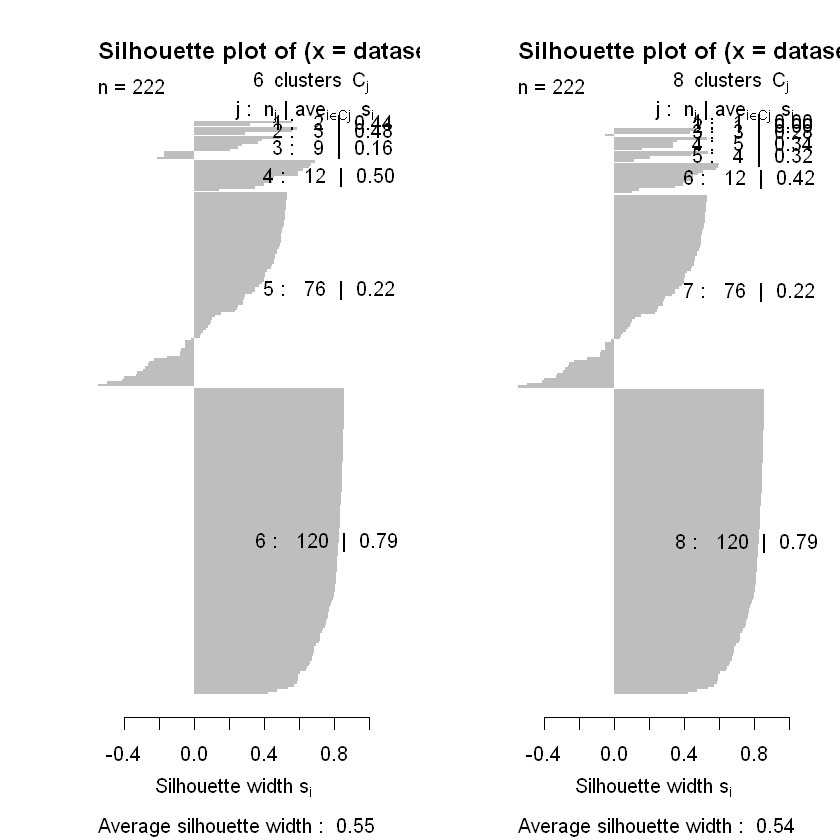

In [96]:
d <- dist(dataset_select_clustering_scale3)

par(mfrow = c(1, 2))
plot(silhouette(dataset_hclust_results1$cluster, d))
plot(silhouette(dataset_hclust_results2$cluster, d))
par(mfrow = c(1, 2))
plot(silhouette(dataset_hclust_results3$cluster, d))
plot(silhouette(dataset_hclust_results4$cluster, d))

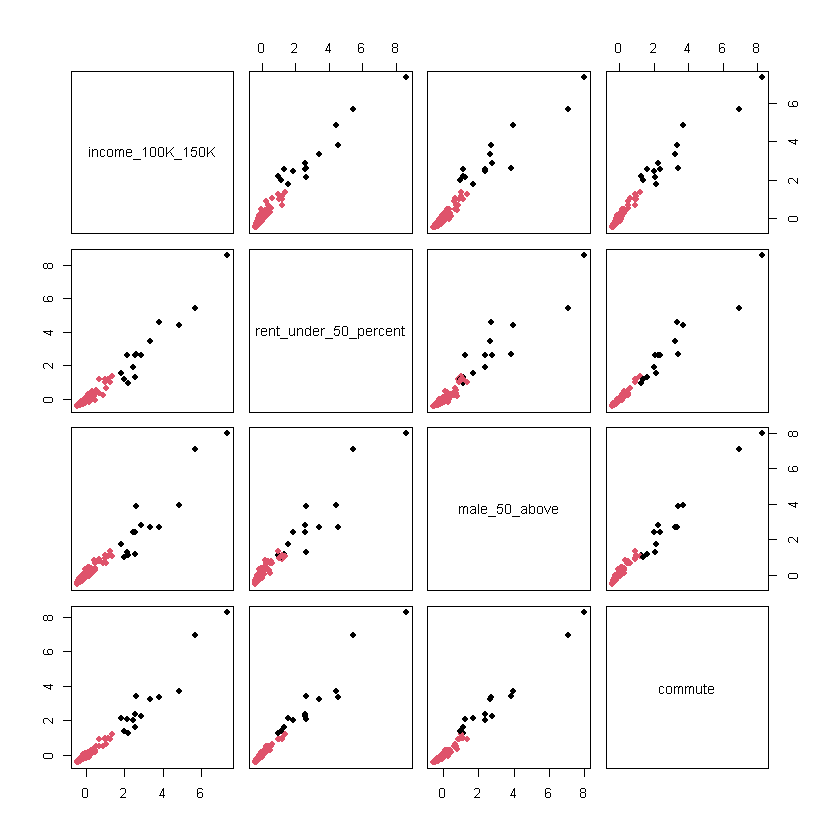

In [97]:
pairs(dataset_select_clustering_scale3, 
      pch = 16, col = as.numeric(dataset_hclust_results1$cluster))

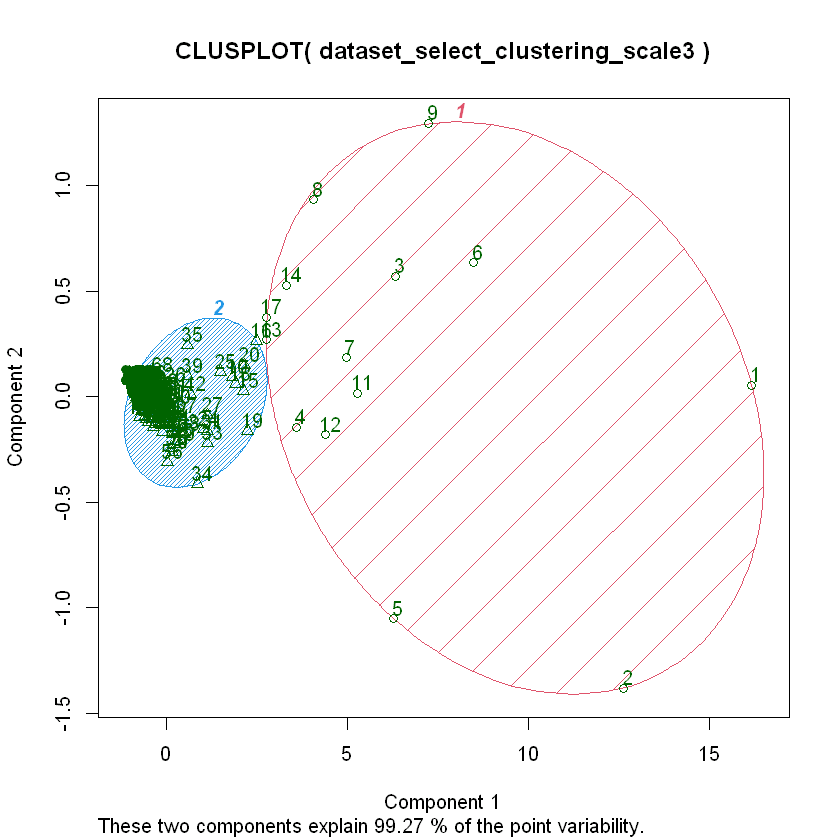

In [98]:
winner3<- dataset_hclust_results1$cluster
clusplot(dataset_select_clustering_scale3, dataset_hclust_results1$cluster, color = TRUE, shade = TRUE, 
         labels = 2, lines = 0)

[1] 222

[1] 4488

[1] 254

[1] 4488

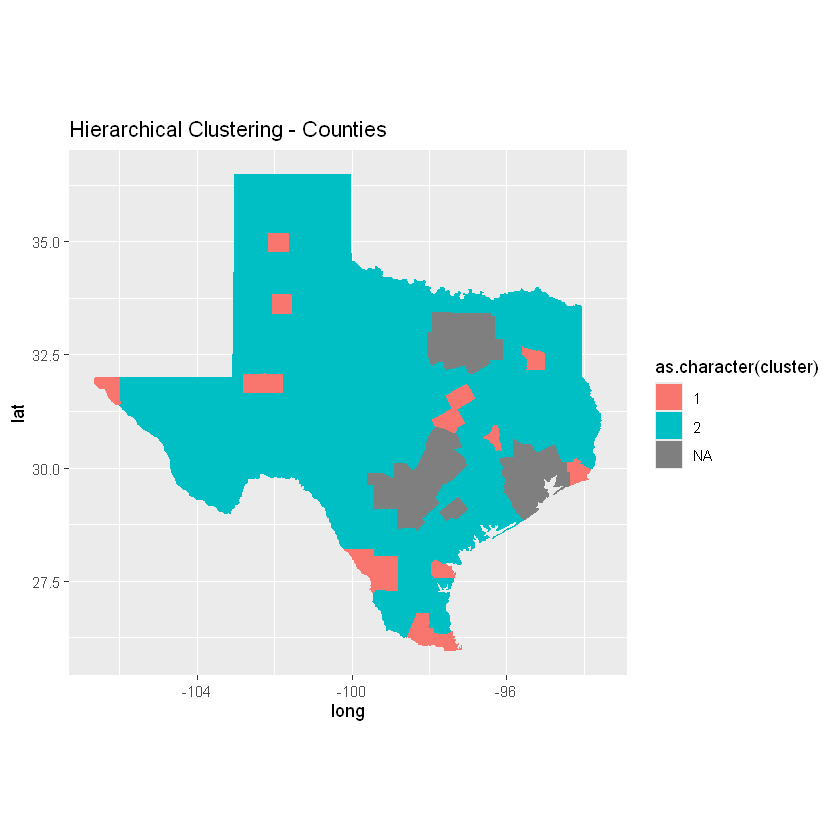

In [99]:
counties <- as_tibble(map_data("county"))
counties_TX <- counties %>% dplyr::filter(region == "texas") %>% rename(c(county = subregion))

dataset_hclust_results1 <- dataset_hclust_results1 %>% mutate(county = county_name %>% str_to_lower() %>% 
    str_replace('\\s+county\\s*$', ''))
nrow(dataset_hclust_results1)
nrow(counties_TX)
dataset_hclust_results_map<-right_join(dataset_hclust_results1,counties_TX, join_by(county))

length(unique(dataset_hclust_results_map$county))
nrow(dataset_hclust_results_map)

ggplot(dataset_hclust_results_map, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = as.character(cluster))) +
  coord_quickmap() +
  labs(title = "Hierarchical Clustering - Counties")

#### Cluster 4

In [100]:
dataset_hclust_results1 <- dataset_select_clustering
dataset_hclust_results2 <- dataset_select_clustering
dataset_hclust_results3 <- dataset_select_clustering
dataset_hclust_results4 <- dataset_select_clustering
dataset_hclust_results1$cluster <- cutree(cluster4, 2)
dataset_hclust_results2$cluster <- cutree(cluster4, 4)
dataset_hclust_results3$cluster <- cutree(cluster4, 6)
dataset_hclust_results4$cluster <- cutree(cluster4, 8)

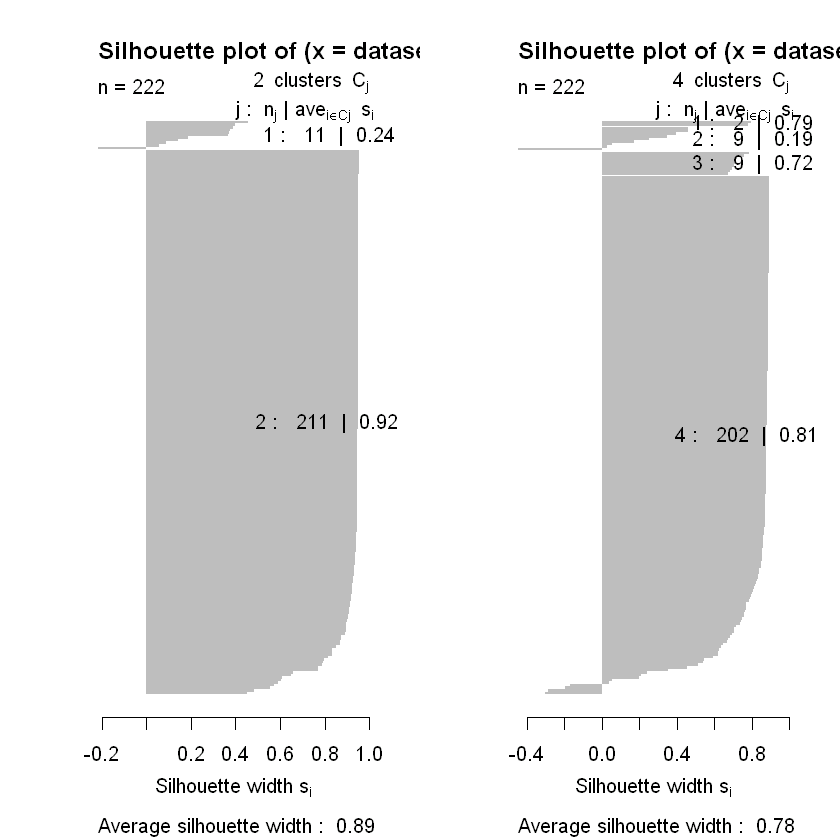

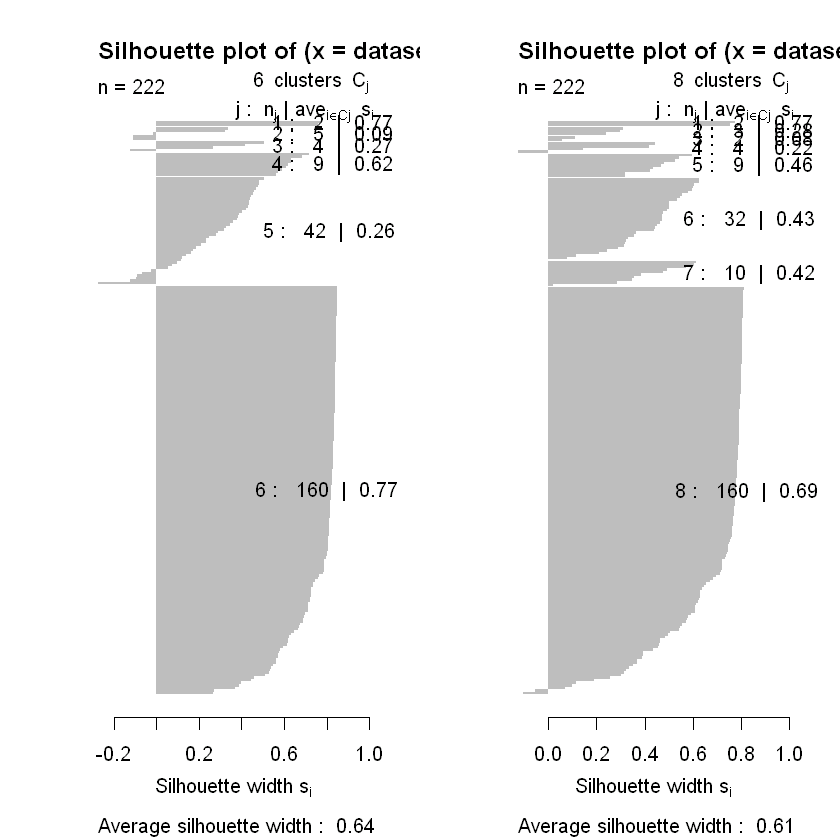

In [101]:
d <- dist(dataset_select_clustering_scale4)

par(mfrow = c(1, 2))
plot(silhouette(dataset_hclust_results1$cluster, d))
plot(silhouette(dataset_hclust_results2$cluster, d))
par(mfrow = c(1, 2))
plot(silhouette(dataset_hclust_results3$cluster, d))
plot(silhouette(dataset_hclust_results4$cluster, d))

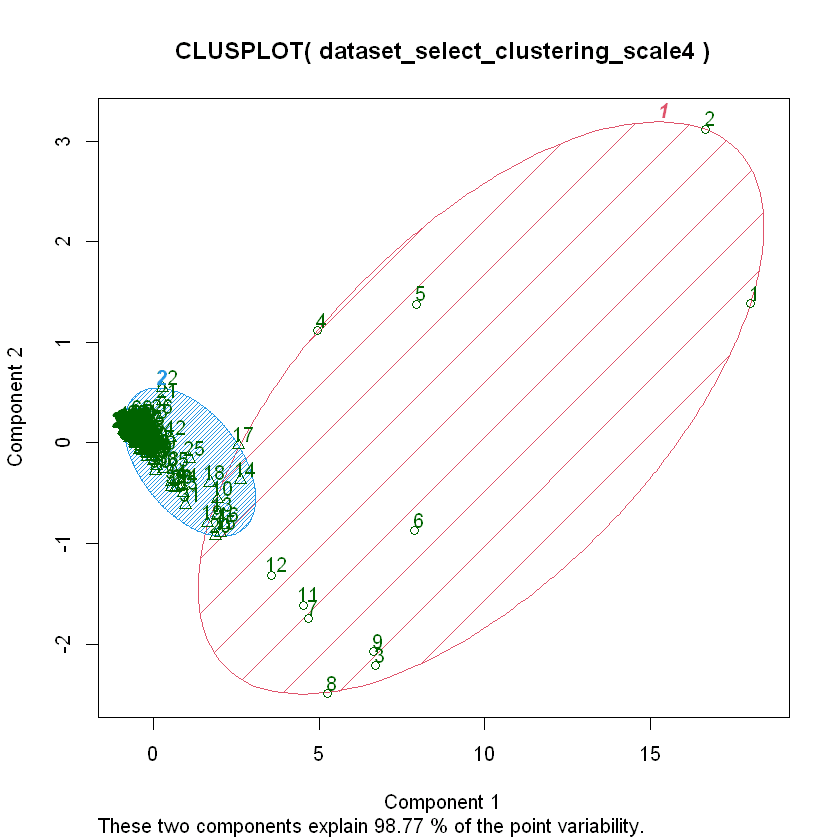

In [102]:
winner4<- dataset_hclust_results1$cluster

clusplot(dataset_select_clustering_scale4, dataset_hclust_results1$cluster, color = TRUE, shade = TRUE, 
         labels = 2, lines = 0)

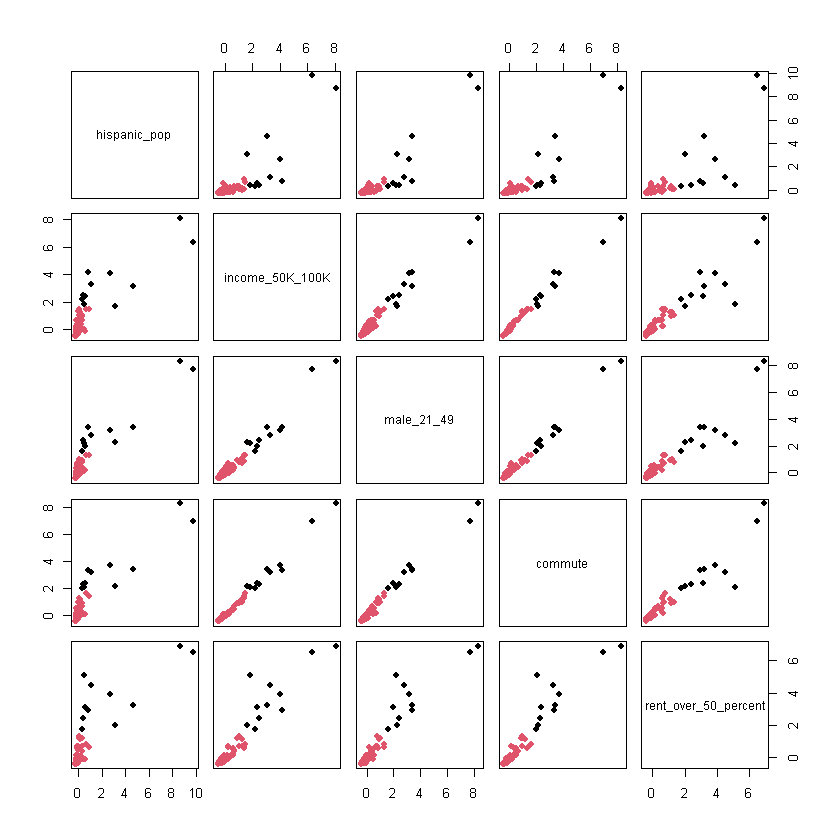

In [103]:
pairs(dataset_select_clustering_scale4, 
      pch = 16, col = as.numeric(dataset_hclust_results1$cluster))

[1] 222

[1] 4488

[1] 254

[1] 4488

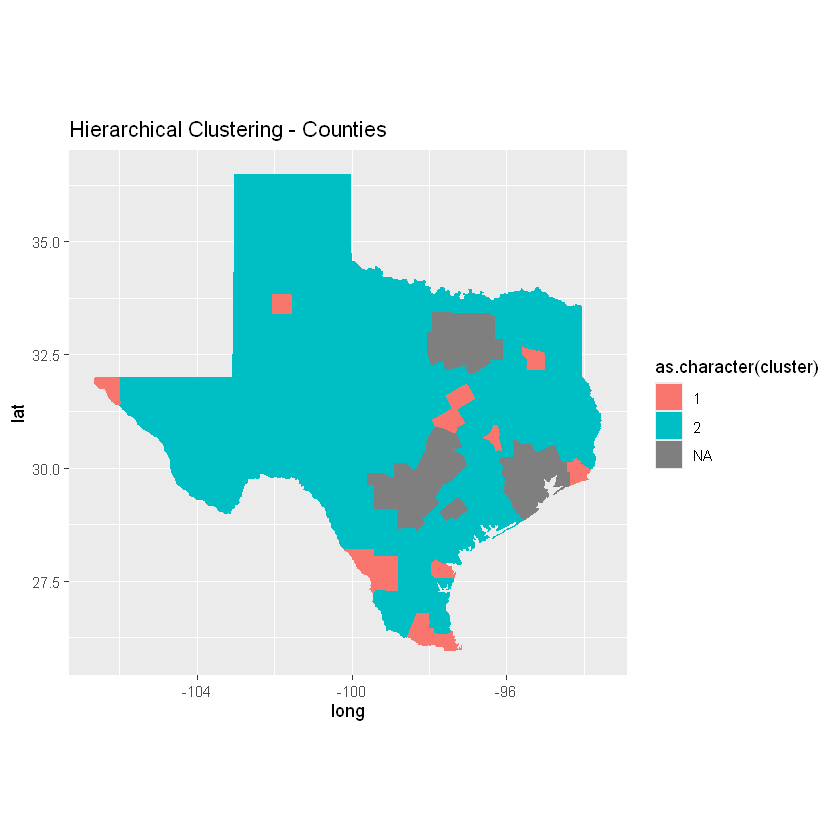

In [104]:
counties <- as_tibble(map_data("county"))
counties_TX <- counties %>% dplyr::filter(region == "texas") %>% rename(c(county = subregion))

dataset_hclust_results1 <- dataset_hclust_results1 %>% mutate(county = county_name %>% str_to_lower() %>% 
    str_replace('\\s+county\\s*$', ''))
nrow(dataset_hclust_results1)
nrow(counties_TX)
dataset_hclust_results_map<-right_join(dataset_hclust_results1,counties_TX, join_by(county))

length(unique(dataset_hclust_results_map$county))
nrow(dataset_hclust_results_map)

ggplot(dataset_hclust_results_map, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = as.character(cluster))) +
  coord_quickmap() +
  labs(title = "Hierarchical Clustering - Counties")

From this Silhoette Plot also, We can infer that the **2 clusters have the maximum silohoette score**. 2 is the optimal number of clusters based on the selected features

## Visualizing the Clusters

#### Corelation Plot of feature variables based in the cluster


The non-colored counties are the metropolitan counties that were removed from the analysis

## Supervised Cluster evaluation

### Creating a ground truth feature to evaluate the cluster

In [105]:
ground_truth <- ifelse(dataset_select_clustering$death_per_case<=0.03961965, 1, 2)
table(ground_truth)

ground_truth
  1   2 
192  30 

### Evaluating the CLuster using the Purity Function

In [106]:
# Purity function


purity(winner1,ground_truth)
purity(winner2,ground_truth)
purity(winner3,ground_truth)
purity(winner4,ground_truth)

,ClassLabels,ClusterLabels,ClusterSize
,<chr>,<chr>,<dbl>
1,2,1,166


,ClassLabels,ClusterLabels,ClusterSize
,<chr>,<chr>,<dbl>
1,4,1,172


,ClassLabels,ClusterLabels,ClusterSize
,<chr>,<chr>,<dbl>
1,2,1,178


,ClassLabels,ClusterLabels,ClusterSize
,<chr>,<chr>,<dbl>
1,2,1,181


# References

https://www.statology.org/hierarchical-clustering-in-r/ <br>
https://www.geeksforgeeks.org/fuzzy-clustering-in-r/  <br>
https://uc-r.github.io/hc_clustering  <br>
https://www.geeksforgeeks.org/dbscan-clustering-in-r-programming/ <br>
https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/
